In [1]:
# Importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pima = pd.read_csv('../Data/PimaIndians.csv')

In [3]:
pima

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif
5,5,166,72,19,175,25.8,0.587,51,positif
6,0,118,84,47,230,45.8,0.551,31,positif
7,1,103,30,38,83,43.3,0.183,33,negatif
8,1,115,70,30,96,34.6,0.529,32,positif
9,3,126,88,41,235,39.3,0.704,27,negatif


# Data Cleaning

In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
pregnant     392 non-null int64
glucose      392 non-null int64
diastolic    392 non-null int64
triceps      392 non-null int64
insulin      392 non-null int64
bmi          392 non-null float64
diabetes     392 non-null float64
age          392 non-null int64
test         392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 27.6+ KB


### Figuring out number of null values in each column

In [6]:
pima.isnull().sum()

pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64

** Hence, there are no missing values in the dataset. **

## Target Variable :

In [7]:
pima.test.unique()

array(['negatif', 'positif'], dtype=object)

### There are 2 classes - 
```
    1. negatif - no diabetes
    2. positif - diabetes
    
Replacing the classes :
    0 - negatif
    1 - positif
```

In [8]:
pima = pima.replace(('negatif', 'positif'), (0,1))

In [9]:
# Converting the type of target variable to bool.
pima.test = pima.test.astype(bool)

In [10]:
pima.dtypes

pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test            bool
dtype: object

In [11]:
pima

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,False
1,0,137,40,35,168,43.1,2.288,33,True
2,3,78,50,32,88,31.0,0.248,26,True
3,2,197,70,45,543,30.5,0.158,53,True
4,1,189,60,23,846,30.1,0.398,59,True
5,5,166,72,19,175,25.8,0.587,51,True
6,0,118,84,47,230,45.8,0.551,31,True
7,1,103,30,38,83,43.3,0.183,33,False
8,1,115,70,30,96,34.6,0.529,32,True
9,3,126,88,41,235,39.3,0.704,27,False


# Data visualization : 

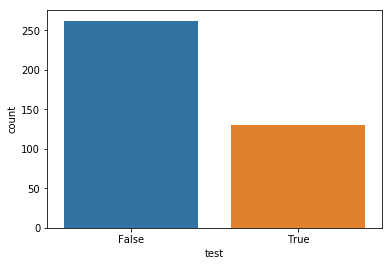

In [12]:
sns.countplot(pima.test)

In [13]:
pima.plot.pie(y='test', figsize=(5, 5))

TypeError: Empty 'DataFrame': no numeric data to plot

In [11]:
pima.test.value_counts()

0    262
1    130
Name: test, dtype: int64

### Out of the total patients, nearly 33.33% of them show signs of diabetes.

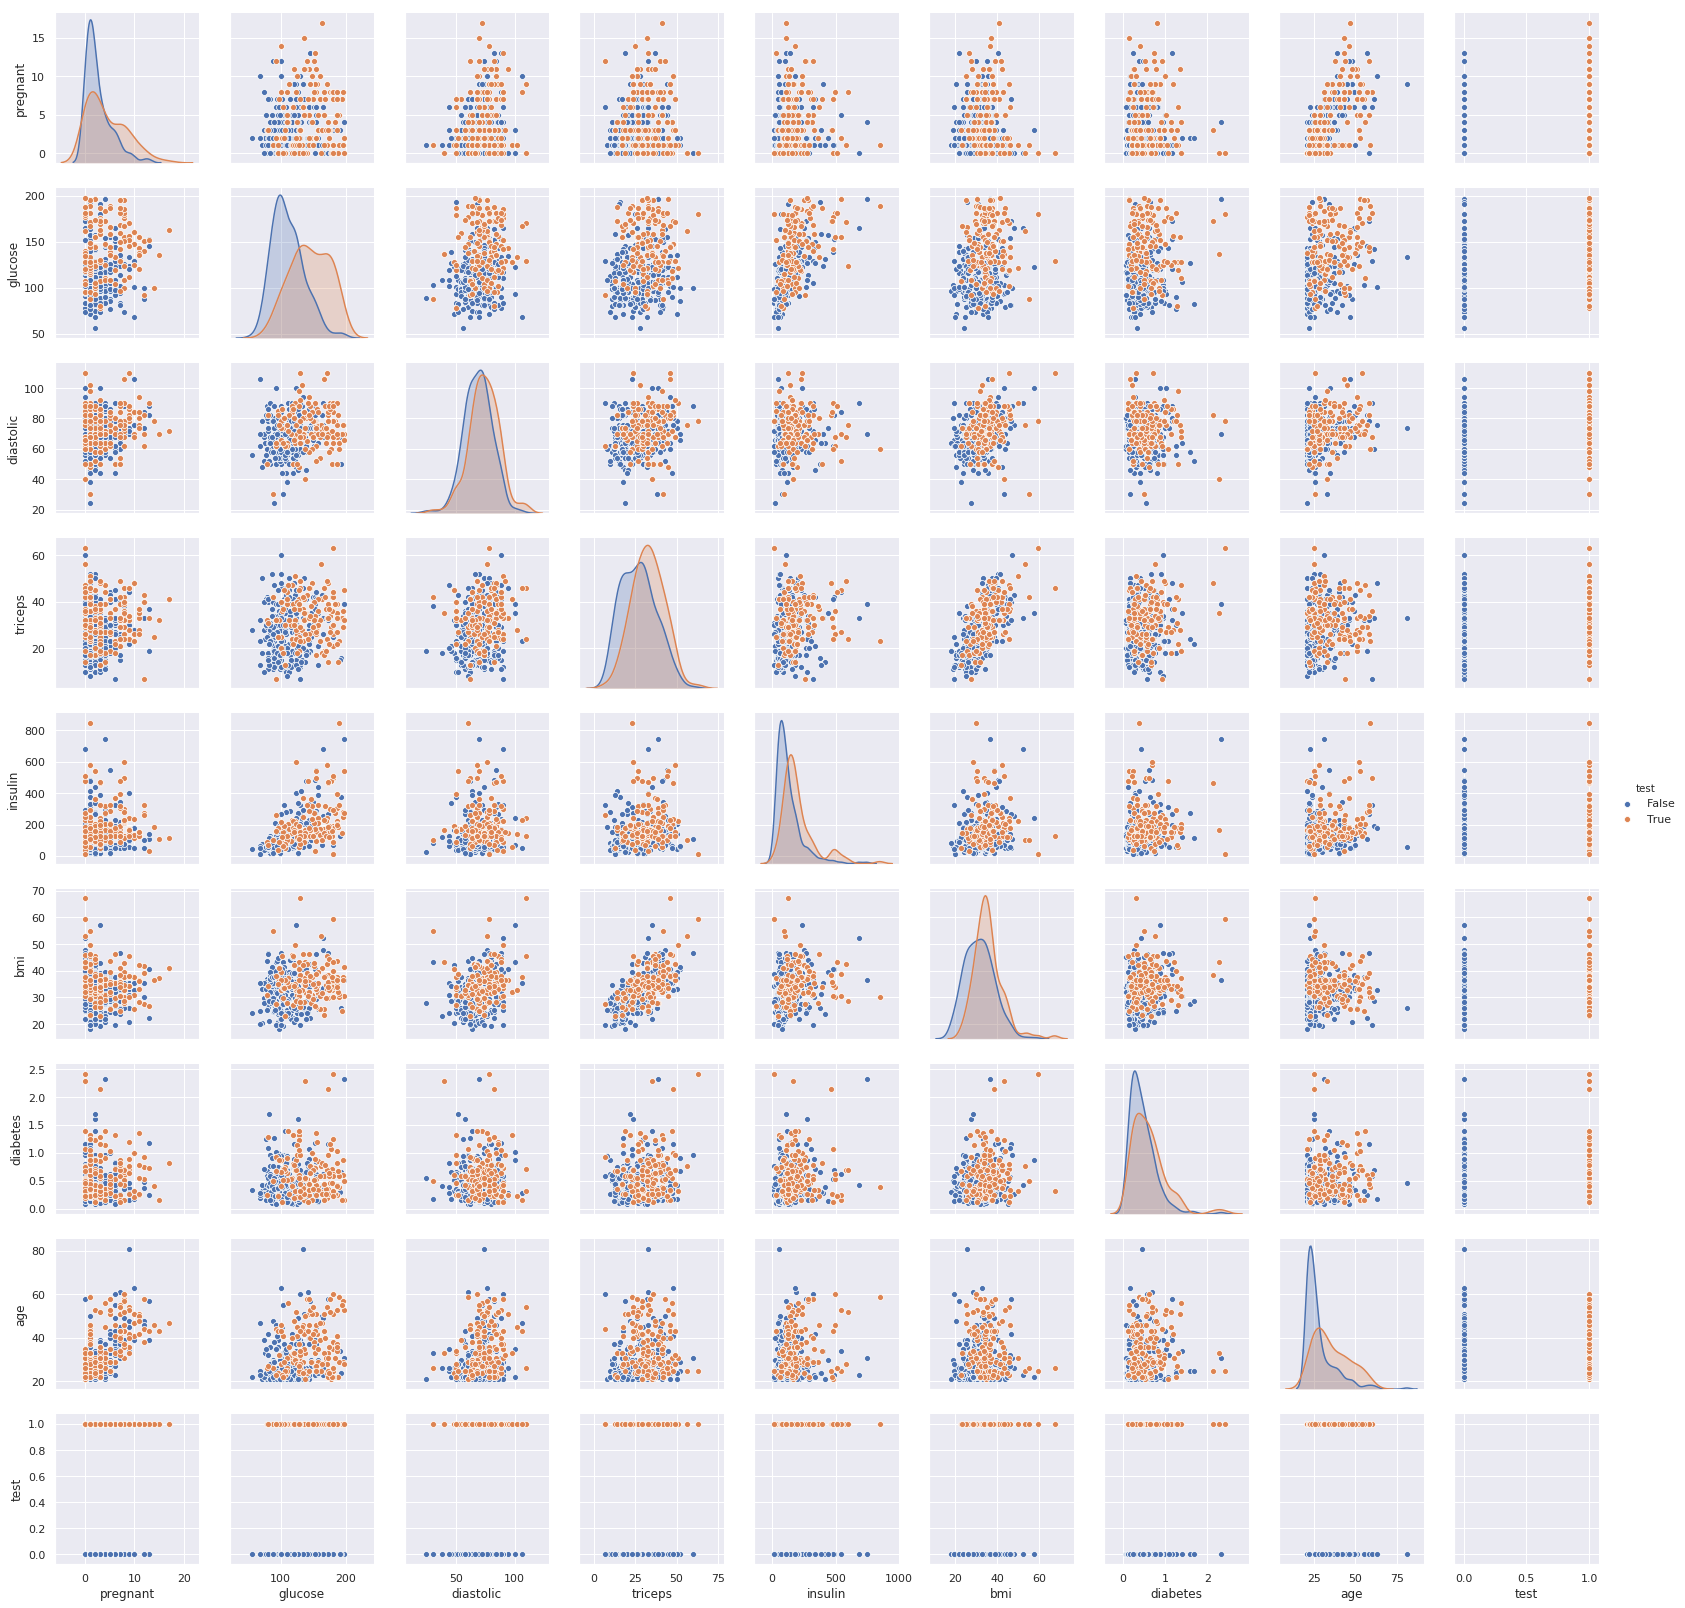

In [58]:
g = sns.pairplot(pima, hue="test")

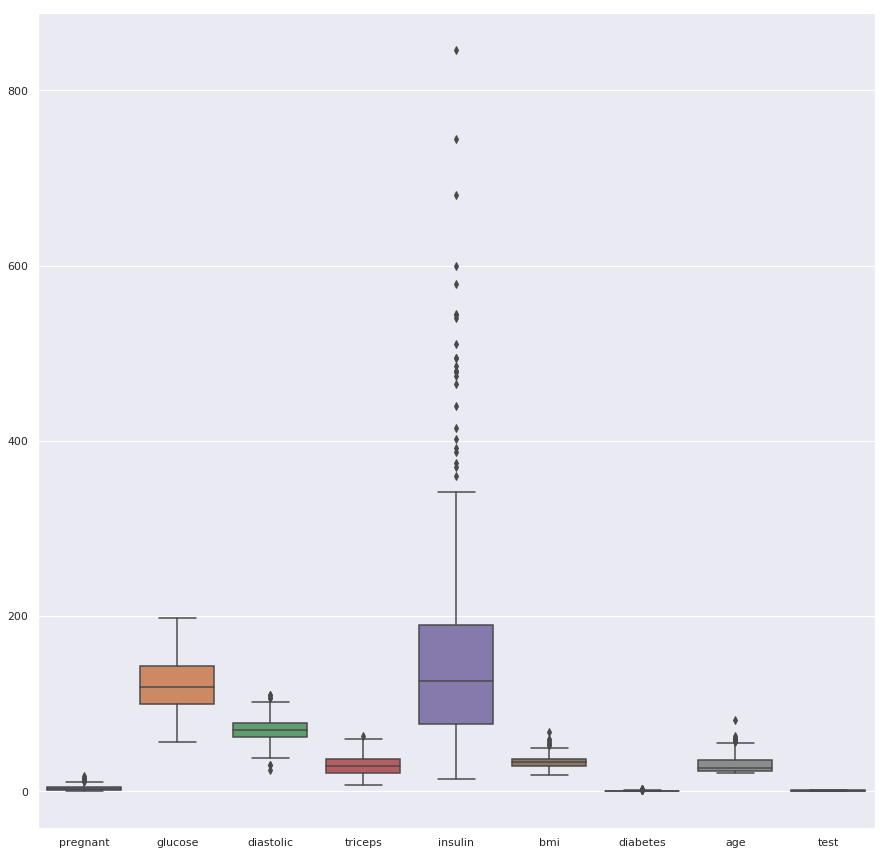

In [68]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(data=pima)

# Age - continuous variable

In [12]:
pima.groupby(['age']).test.value_counts().sort_index().unstack()

test,0,1
age,,
21,31.0,2.0
22,38.0,5.0
23,25.0,3.0
24,25.0,6.0
25,21.0,9.0
26,19.0,5.0
27,11.0,3.0
28,14.0,7.0
29,6.0,8.0


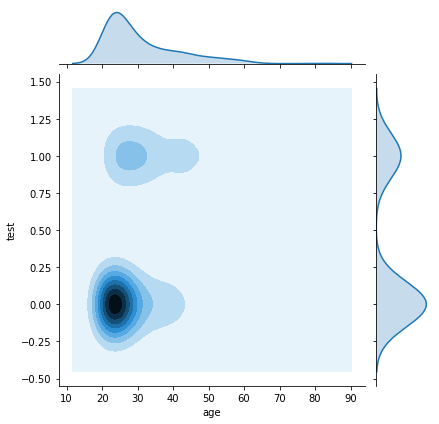

In [13]:
sns.jointplot(x='age', y='test', data=pima, kind='kde')

In [14]:
pima.groupby(['test']).agg({'age':'mean'})

,age
test,
0,28.347328
1,35.938462


In [15]:
pima.groupby(['test']).agg({'age':'median'})

,age
test,
0,25
1,33


### The group showing signs of diabetes( i.e. test = 1) have higher mean age than its counterpart. 

# Pregnant
```
It represents the number of times the woman got pregnant during her life.
```

In [16]:
pima.groupby(['pregnant']).test.value_counts().sort_index().unstack()

test,0,1
pregnant,,
0,37.0,19.0
1,73.0,20.0
2,52.0,12.0
3,26.0,19.0
4,21.0,6.0
5,13.0,8.0
6,15.0,4.0
7,10.0,10.0
8,3.0,11.0


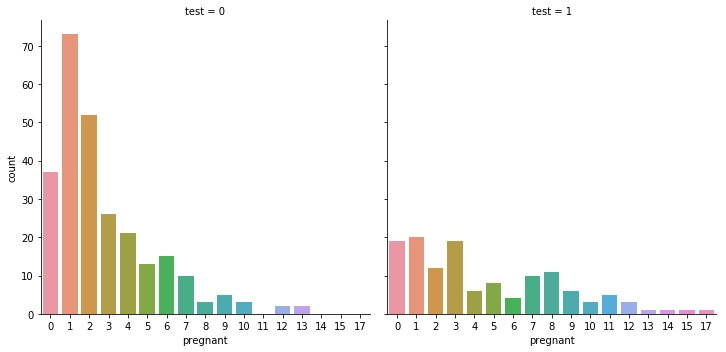

In [17]:
sns.catplot('pregnant', col='test', data=pima, kind='count')

### The group not showing signs of diabetes comprises of the women having lesser pregnancies whereas the group showing signs of diabetes is almost evenly distributed over any number of pregnancies.

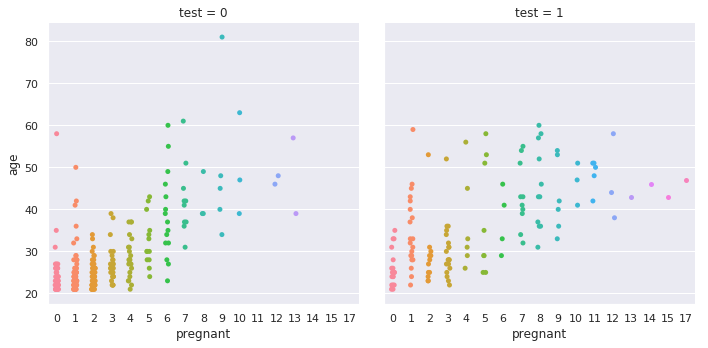

In [34]:
sns.catplot(x='pregnant',y='age', col='test', data=pima)

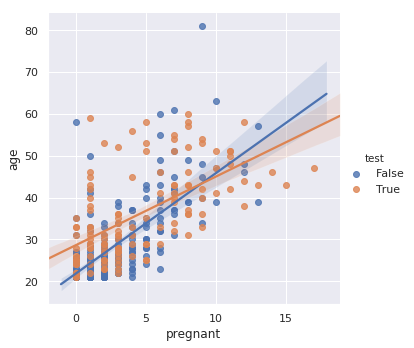

In [56]:
sns.lmplot(x='pregnant', y='age',hue='test', data=pima)

### We can say that higher number of pregnancies are prevalent only in older aged women.

# Glucose

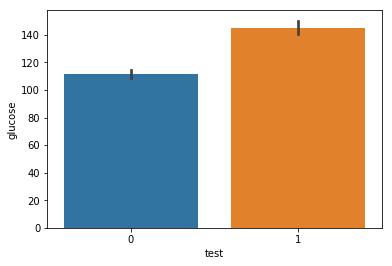

In [18]:
sns.barplot(x='test', y='glucose', data=pima)

In [19]:
pima.groupby(['test']).agg({'glucose':'mean'})

,glucose
test,
0,111.431298
1,145.192308


### Mean glucose level of people showing signs of diabetes is around 145 and of their counterpart is low, 111.

# Insulin
```
It represents the rate of insulin 2 hours serum insulin (mu U/ml).
```

In [25]:
pima.groupby(['test']).agg({'insulin':'mean'})

,insulin
test,
0,130.854962
1,206.846154


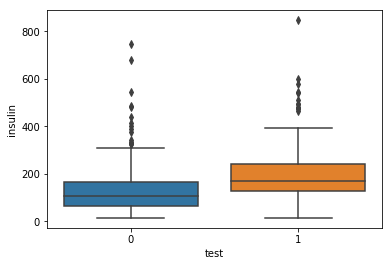

In [26]:
sns.boxplot(pima.test, pima.insulin)

### The IQR ranges at higher insulin levels for those showing signs of diabetes.

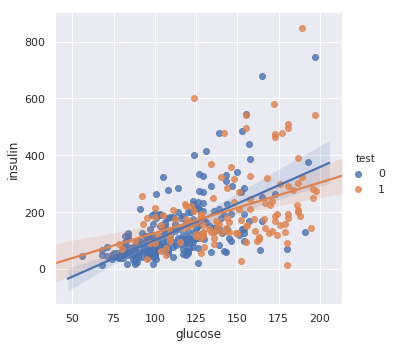

In [41]:
sns.lmplot(x='glucose', y='insulin',hue='test', data=pima)

### 1.  High glucose and high insulin together lead to the patient showing sign of diabetes to some extent.
### 2. Glucose and insulin are correlated to some extent.

# Diastolic Blood Pressure
```
The blood pressure is a very well-known way to measure the health of the heart of a person, there are too measure in fact, the diastolic and the systolic. In this data set, we have the diastolic which is in the fact the pressure in (mm/Hg) when the heart relaxed after the contraction.
```

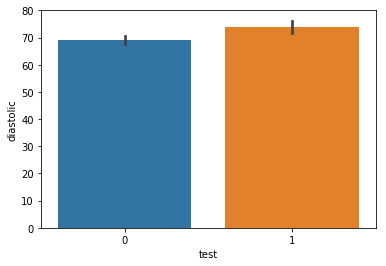

In [20]:
sns.barplot(x='test', y='diastolic', data=pima)

In [21]:
pima.groupby(['test']).agg({'diastolic':'mean'})

,diastolic
test,
0,68.969466
1,74.076923


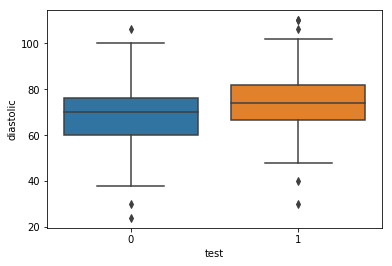

In [22]:
sns.boxplot(pima.test, pima.diastolic)

### The mean diastolic blood pressure of people showing signs of diabetes is slightly higher than their counterparts. 

# Triceps
```
It is a value used to estimate body fat (mm) which is measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.

```

In [23]:
pima.groupby(['test']).agg({'triceps':'mean'})

,triceps
test,
0,27.251908
1,32.961538


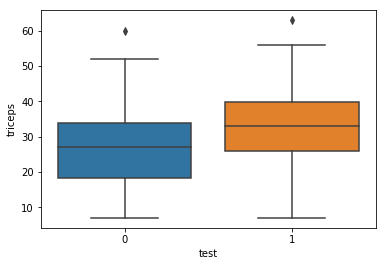

In [24]:
sns.boxplot(pima.test, pima.triceps)

### The mean value of Triceps of those showing signs of diabetes is higher than its counterpart.

# BMI
```
It represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person.
```

In [27]:
pima.groupby(['test']).agg({'bmi':'mean'})

,bmi
test,
0,31.750763
1,35.777692


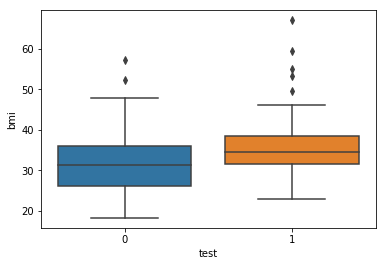

In [28]:
sns.boxplot(pima.test, pima.bmi)

### 1. The BMI of those not showing sign of diabetes has a higher variability. 
### 2. The average BMI of those showing signs of diabetes is slightly higher than its counterpart.

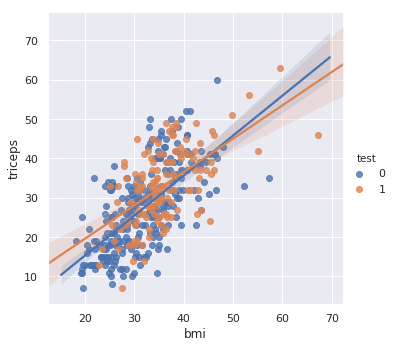

In [42]:
sns.lmplot(x='bmi', y='triceps',hue='test', data=pima)

### 1. Triceps and BMI have a strong correlation.
### 2. Higher values of both triceps and BMI together show signs of diabetes to some extent.

# History of Diabetes
```
It is an indicator of history of diabetes in the family.
```

In [29]:
pima.groupby(['test']).agg({'diabetes':'mean'})

,diabetes
test,
0,0.472168
1,0.625585


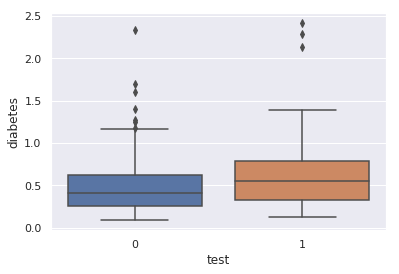

In [30]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(pima.test, pima.diabetes)

### The history of diabetes does seem to have some influence on showing signs of diabetes by the woman.

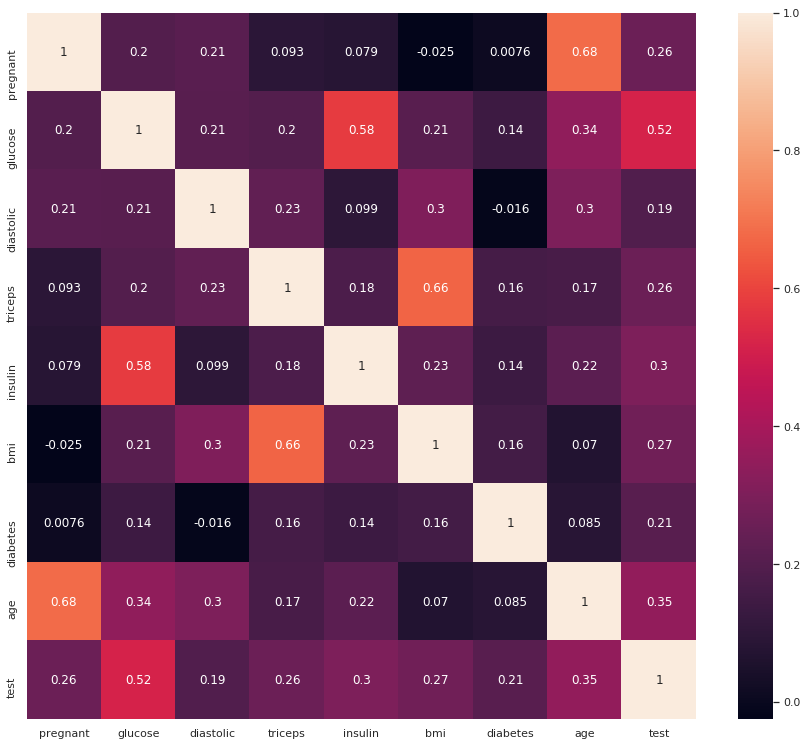

In [43]:
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(pima.corr(),annot=True)